# Project Title: Prediction Product AD Campaign Performance

#### Problem Statement :  
Our client, a leading outdoor apparel company, seeks to predict the performance of product ad campaigns before launch to optimize their marketing efforts. This project aims to develop a predictive model that forecasts key performance indicators (KPIs) for future campaigns, providing valuable insights for strategic decision-making and resource allocation. Ultimately, this will enhance marketing effectiveness and improve the ROI by focusing on the most effective channels and strategies.

## About the dataset:

limit_infor: limits or restrictions associated with the marketing campaign or product.

campaign_type: type of marketing campaign, such as email, social media, print advertising,etc

campaign_level: level or scale of the marketing campaign, for example, national, regional, or local.

product_level: level or category of the product being marketed, such as high-end, mid-range, or budget.

resource_amount: resources (e.g., budget, personnel, or materials) allocated for the marketing campaign.

email_rate: email delivery rate or open rate.

price: selling price of the product.

discount_rate: discounts or promotional offers associated with the product.

hour_resources: the number of labor hours or human resources dedicated to the marketing campaign or product sales efforts.

campaign_fee: fees or costs associated with running the marketing campaign.

orders: number of orders or sales generated for the product during the marketing campaign.

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Getting basic statistics for the data](#dtype)**
    - 2.3 - **[Check the Data Type](#info)**
    - 2.4 - **[Check for duplicates](#dup)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Distribution of Variables](#dist)**
    - 2.7 - **[Scale the Data](#scale)**
    - 2.8 - **[Train-Test Split](#split)**
3. **[Linear Regression](#linear)**
4. **[Support Vector Machine (SVM)](#svm)**
5. **[Random Forest Regression(RFR)](#rfr)**
    - 5.1 - **[Tune the Hyperparameters using GridSearchCV](#tune)**
    - 5.2 - **[Identify the Important Features](#features)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [ ]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# import 'Seaborn'
import seaborn as sns

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import MinMaxScaler to perform scaling
from sklearn.preprocessing import MinMaxScaler


# import train-test split
from sklearn.model_selection import train_test_split

# import various functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

In [ ]:
# load the csv file
# store the data in 'df'
df = pd.read_csv("products_campaign_sales.csv")

#### Read the dataset and print the first five observations.

In [ ]:
# display first 5 columns
df.head()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529


In [ ]:
# use 'shape' to check the dimension of data
df.shape

(731, 11)

**Interpretation:** The dataset has 731 rows and 11 columns.

<a id="dtype"></a>
## 2.2 Getting Basic Statistics for the Data

In [ ]:
df.describe()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,729.000000,731.000000,731.000000,731.000000,731.000000
mean,0.042408,2.997264,0.683995,1.395349,4.952120,0.474337,162.812071,0.809617,848.176471,3696.391245,4531.079343
std,0.404911,2.004787,0.465233,0.544894,1.838449,0.162913,14.267136,0.077679,686.622488,1908.643139,1932.532346
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.080000,100.000000,0.490000,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.340000,152.000000,0.770000,315.500000,2497.000000,3199.000000
50%,0.000000,3.000000,1.000000,1.000000,5.000000,0.490000,163.000000,0.820000,713.000000,3662.000000,4563.000000
75%,0.000000,5.000000,1.000000,2.000000,7.000000,0.610000,173.000000,0.870000,1096.000000,4795.500000,6011.500000
max,10.000000,6.000000,1.000000,3.000000,9.000000,0.840000,197.000000,0.980000,3410.000000,33380.000000,8714.000000


<a id="info"></a>
## 2.3 Check the Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      731 non-null    int64  
 1   campaign_type    731 non-null    int64  
 2   campaign_level   731 non-null    int64  
 3   product_level    731 non-null    int64  
 4   resource_amount  731 non-null    int64  
 5   email_rate       731 non-null    float64
 6   price            729 non-null    float64
 7   discount_rate    731 non-null    float64
 8   hour_resouces    731 non-null    int64  
 9   campaign_fee     731 non-null    int64  
 10  orders           731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


**Interpretation:**
The dataframe has 731 entries and 11 columns. The columns include limit_infor, campaign_type, campaign_level, product_level, resource_amount, email_rate, price, discount_rate, hour_resouces, campaign_fee, and orders. There are three columns with float data types and eight with integer data types, with the price column having two missing values. The dataframe's memory usage is 62.9 KB.

<a id="dup"></a>
## 2.4 Check for dupicates

In [ ]:
# checking for duplicates in the dataset
df_dup = df[df.duplicated()]
df_dup

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders


### Intepretation
- There are no duplicate values present in the dataset

<a id="null"></a>
## 2.5 Missing Value Treatment

#### First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [ ]:
df.isnull().sum()

limit_infor        0
campaign_type      0
campaign_level     0
product_level      0
resource_amount    0
email_rate         0
price              2
discount_rate      0
hour_resouces      0
campaign_fee       0
orders             0
dtype: int64

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['price']

**Interpretation:** 'price' columns have 2 missing values

In [ ]:
### display the rows having null values
df[df.isnull().any(axis=1)]

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
55,0,6,0,2,2,0.25,NaN,0.84,222,1026,1248
120,0,3,1,2,3,0.30,NaN,0.79,78,1572,1650


In [ ]:
## find out total percentage of missing values in 'price'
Total = df.isnull().sum().sort_values(ascending=False)

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
price,2,0.273598
limit_infor,0,0.000000
campaign_type,0,0.000000
campaign_level,0,0.000000
product_level,0,0.000000
resource_amount,0,0.000000
email_rate,0,0.000000
discount_rate,0,0.000000
hour_resouces,0,0.000000
campaign_fee,0,0.000000


**Interpretation:** The 'price' column had 2 missing values, which accounted for approximately 0.27% of the total rows. Hence, the rows with missing values will be removed.

In [ ]:
#remove rows with missing values
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      729 non-null    int64  
 1   campaign_type    729 non-null    int64  
 2   campaign_level   729 non-null    int64  
 3   product_level    729 non-null    int64  
 4   resource_amount  729 non-null    int64  
 5   email_rate       729 non-null    float64
 6   price            729 non-null    float64
 7   discount_rate    729 non-null    float64
 8   hour_resouces    729 non-null    int64  
 9   campaign_fee     729 non-null    int64  
 10  orders           729 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 68.3 KB


#### Lets compare the dataframe before and after removal of rows with missing values

In [ ]:
# check statistics of the original dataframe "df"
df.describe()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,729.000000,731.000000,731.000000,731.000000,731.000000
mean,0.042408,2.997264,0.683995,1.395349,4.952120,0.474337,162.812071,0.809617,848.176471,3696.391245,4531.079343
std,0.404911,2.004787,0.465233,0.544894,1.838449,0.162913,14.267136,0.077679,686.622488,1908.643139,1932.532346
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.080000,100.000000,0.490000,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.340000,152.000000,0.770000,315.500000,2497.000000,3199.000000
50%,0.000000,3.000000,1.000000,1.000000,5.000000,0.490000,163.000000,0.820000,713.000000,3662.000000,4563.000000
75%,0.000000,5.000000,1.000000,2.000000,7.000000,0.610000,173.000000,0.870000,1096.000000,4795.500000,6011.500000
max,10.000000,6.000000,1.000000,3.000000,9.000000,0.840000,197.000000,0.980000,3410.000000,33380.000000,8714.000000


In [ ]:
# check statistics of the dataframe without the missing values  "df_cleaned"
df_cleaned.describe()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.00000,729.000000
mean,0.042524,2.993141,0.684499,1.393690,4.958848,0.474883,162.812071,0.809602,850.091907,3702.96845,4539.534979
std,0.405460,2.004448,0.465034,0.544719,1.836282,0.162796,14.267136,0.077775,686.577432,1907.06287,1928.383275
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.080000,100.000000,0.490000,2.000000,20.00000,22.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.340000,152.000000,0.770000,317.000000,2506.00000,3214.000000
50%,0.000000,3.000000,1.000000,1.000000,5.000000,0.490000,163.000000,0.820000,721.000000,3667.00000,4569.000000
75%,0.000000,5.000000,1.000000,2.000000,7.000000,0.610000,173.000000,0.870000,1097.000000,4801.00000,6031.000000
max,10.000000,6.000000,1.000000,3.000000,9.000000,0.840000,197.000000,0.980000,3410.000000,33380.00000,8714.000000


**Interpretation:**  The difference between basic statistics of "df" and "df_cleaned" is not significant. Hence, for further analysis df_cleaned will be used.

<a id="dist"></a>
## 2.6 Distribution of Variables

**Distribution of numeric independent variables.**

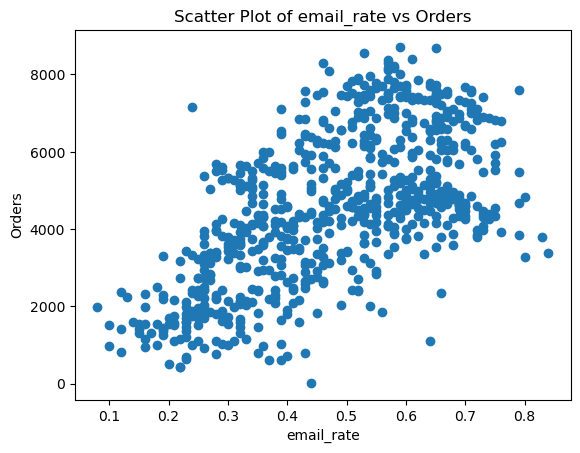

In [ ]:
# plotting a scatter plot to compare 'price' and 'orders'
plt.scatter(df_cleaned['email_rate'], df_cleaned['orders'])
plt.xlabel('email_rate')
plt.ylabel('Orders')
plt.title('Scatter Plot of email_rate vs Orders')
plt.show()

### Interpretation
- 'email_rate is directly related to 'orders'

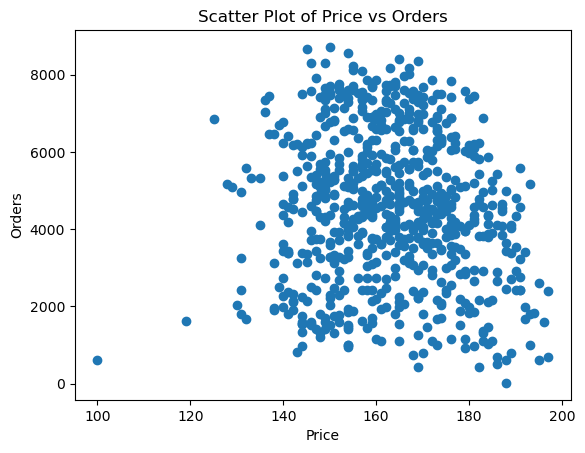

In [ ]:
# plotting a scatter plot to compare 'price' and 'orders'
plt.scatter(df_cleaned['price'], df_cleaned['orders'])
plt.xlabel('Price')
plt.ylabel('Orders')
plt.title('Scatter Plot of Price vs Orders')
plt.show()

**Interpretation:** The scatter plot indicates a non-linear relationship between price and the number of orders

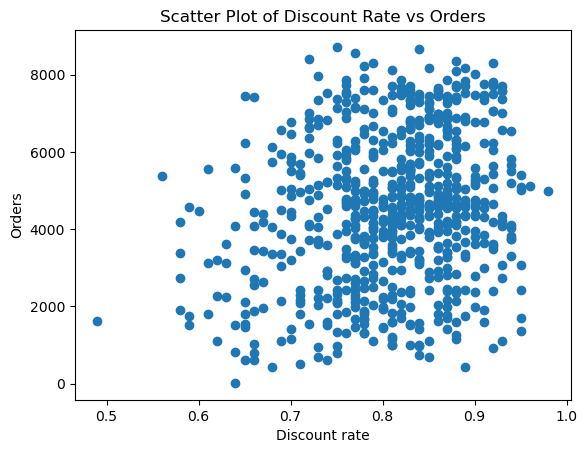

In [ ]:
# plotting a scatter plot to compare 'price' and 'orders'
plt.scatter(df_cleaned['discount_rate'], df_cleaned['orders'])
plt.xlabel('Discount rate')
plt.ylabel('Orders')
plt.title('Scatter Plot of Discount Rate vs Orders')
plt.show()

**Interpretation:** 'discount_rate' forms a linear relationship with 'orders' although it is not very significant

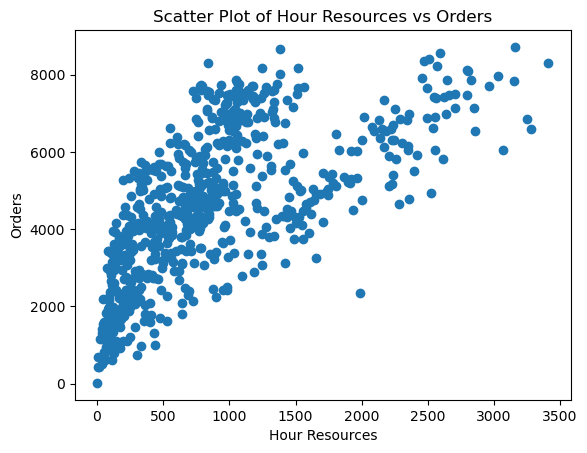

In [ ]:
# plotting a scatter plot to compare 'price' and 'orders'
plt.scatter(df_cleaned['hour_resouces'], df_cleaned['orders'])
plt.xlabel('Hour Resources')
plt.ylabel('Orders')
plt.title('Scatter Plot of Hour Resources vs Orders')
plt.show()

**Interpretation:** 'hour_resources' forms a linear relationship with 'orders'

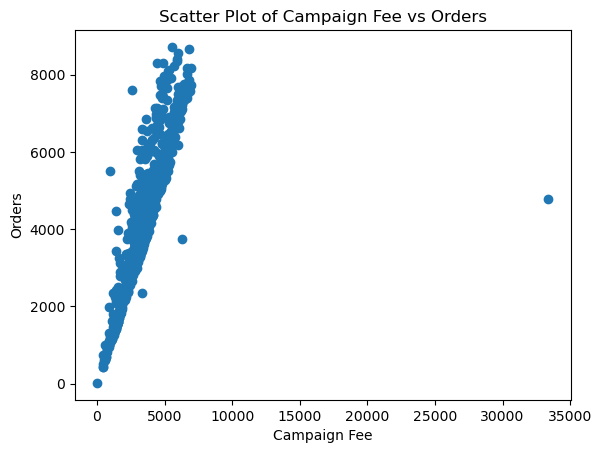

In [ ]:
# plotting a scatter plot to compare 'price' and 'orders'
plt.scatter(df_cleaned['campaign_fee'], df_cleaned['orders'])
plt.xlabel('Campaign Fee')
plt.ylabel('Orders')
plt.title('Scatter Plot of Campaign Fee vs Orders')
plt.show()

**Interpretation:** It is evident from the above graph that there is and outlier in the "campaign_fee"

In [ ]:
#identify the outlier in campaign_fee and group them in new dataframe 'df2'
df2 = df_cleaned[df_cleaned['campaign_fee'] > 30000]
df2

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
633,0,4,1,1,7,0.65,142.0,0.84,812,33380,4792


In [ ]:
# to make the plot 'campaign_fee' vs 'orders' more linear, the outlier needs to identified.
# remove the outlier and save thr new dataframe in 'df_new'
df_new = df_cleaned.drop(df_cleaned[df_cleaned['campaign_fee'] > 30000].index)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      728 non-null    int64  
 1   campaign_type    728 non-null    int64  
 2   campaign_level   728 non-null    int64  
 3   product_level    728 non-null    int64  
 4   resource_amount  728 non-null    int64  
 5   email_rate       728 non-null    float64
 6   price            728 non-null    float64
 7   discount_rate    728 non-null    float64
 8   hour_resouces    728 non-null    int64  
 9   campaign_fee     728 non-null    int64  
 10  orders           728 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 68.2 KB


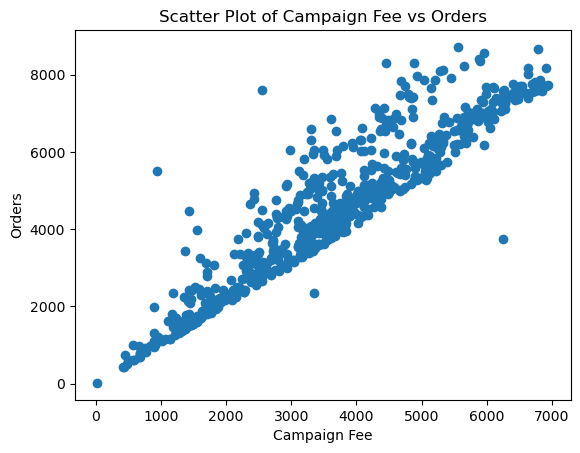

In [ ]:
# plot a scatter plot to compare 'price' and 'orders' after removing the outlier
plt.scatter(df_new['campaign_fee'], df_new['orders'])
plt.xlabel('Campaign Fee')
plt.ylabel('Orders')
plt.title('Scatter Plot of Campaign Fee vs Orders')
plt.show()
plt.show()

**Interpretation:** The 'campaign_fee' shows linear relationship with 'orders'

#### Identify the relationship of independent numerical variables with target variable "orders"

In [ ]:
### group all numerical features in 'df_num'
df_num = df_new[['email_rate', 'price', 'discount_rate','hour_resouces', 'campaign_fee', 'orders']]

# display numerical features
df_num

### identify correlation between different numerical features with target varible 'orders'
correlation_num = df_num.corr()
correlation_num

,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
email_rate,1.000000,0.142366,0.181861,0.542832,0.541290,0.626260
price,0.142366,1.000000,0.251978,-0.078478,-0.092382,-0.103068
discount_rate,0.181861,0.251978,1.000000,0.168008,0.218127,0.233741
hour_resouces,0.542832,-0.078478,0.168008,1.000000,0.392953,0.662783
campaign_fee,0.541290,-0.092382,0.218127,0.392953,1.000000,0.928218
orders,0.626260,-0.103068,0.233741,0.662783,0.928218,1.000000


### Interpretation:

- 'email_rate' (0.628), 'hour_resouces' (0.664), and 'campaign_fee' (0.929) have positive correlations with 'orders',
indicating that as the values of these variables increase, the value of 'orders' tends to increase as well.
Among them, 'campaign_fee' has the highest correlation with 'orders'.

- 'price' (-0.103) has a weak negative correlation with 'orders', indicating that as the price increases,
the number of orders tends to slightly decrease.

- 'discount_rate' (0.232) has a positive correlation with 'orders', suggesting that higher discount rates are associated with higher numbers of orders, but the correlation is not as strong as 'campaign_fee', 'hour_resouces', or 'email_rate'.

#### Identify the relationship of independent categorical variables with target variable "orders"

In [ ]:
# to identify the relationship between different categorical variables, ANOVA will be used
# group all the categorical variables in df_cat
df_cat = df_new[['limit_infor', 'campaign_type', 'campaign_level', 'product_level','resource_amount']]
# Iterate through each categorical column in df_new
for col in df_cat.columns:
    # Skip if the column is 'orders' (numerical)
    if col == 'orders':
        continue

    # Perform ANOVA
    anova_results = sm.stats.anova_lm(sm.OLS.from_formula('orders ~ ' + col, data=df_new).fit(), typ=2)

    # Print the ANOVA results
    print(f"ANOVA results for {col}:\n{anova_results}\n")

ANOVA results for limit_infor:
                   sum_sq     df         F    PR(>F)
limit_infor  1.727772e+06    1.0  0.463652  0.496139
Residual     2.705394e+09  726.0       NaN       NaN

ANOVA results for campaign_type:
                     sum_sq     df         F    PR(>F)
campaign_type  9.684796e+06    1.0  2.606608  0.106854
Residual       2.697437e+09  726.0       NaN       NaN

ANOVA results for campaign_level:
                      sum_sq     df         F    PR(>F)
campaign_level  6.918293e+06    1.0  1.860112  0.173035
Residual        2.700204e+09  726.0       NaN       NaN

ANOVA results for product_level:
                     sum_sq     df          F        PR(>F)
product_level  2.387385e+08    1.0  70.217683  2.742171e-16
Residual       2.468384e+09  726.0        NaN           NaN

ANOVA results for resource_amount:
                       sum_sq     df           F        PR(>F)
resource_amount  1.040262e+09    1.0  453.085575  1.686918e-78
Residual         1.666860e+09  7

### Observations

The ANOVA results provide insights into the relationship between each categorical variable and the numerical variable 'orders'.

- limit_infor: The p-value (PR(>F)) associated with limit_infor is 0.505, which is greater than the typical significance level of 0.05. This suggests that there is no significant relationship between the 'limit_infor' categorical variable and 'orders'.

- campaign_type: The p-value associated with campaign_type is 0.131, which is greater than 0.05. This indicates that there is no significant relationship between the 'campaign_type' categorical variable and 'orders'.

- campaign_level: The p-value associated with campaign_level is 0.158, which is greater than 0.05. This suggests that there is no significant relationship between the 'campaign_level' categorical variable and 'orders'.

- product_level: The p-value associated with product_level is very small (approximately 0). This indicates that there is a significant relationship between the 'product_level' categorical variable and 'orders'. The high F-statistic value (72.148) further supports this conclusion.

- resource_amount: The p-value associated with resource_amount is very small (approximately 0). This suggests that there is a significant relationship between the 'resource_amount' categorical variable and 'orders'. The high F-statistic value (459.525) further supports this conclusion.

**In summary, 'product_level' and 'resource_amount' appear to have a significant relationship with 'orders', while the other categorical variables do not. These results can help prioritize which variables to consider in further analysis or modeling efforts.**


<a id="scale"></a>
## 2.7 Scale the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [ ]:
# Assuming df_num contains your numerical features
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your numerical data
scaler.fit(df_num)

# Transform the numerical data using the fitted scaler
normalized_df = scaler.transform(df_num)
normalized_df_num = pd.DataFrame(normalized_df, columns=df_num.columns)
df_norm = normalized_df_num[['email_rate', 'price', 'discount_rate', 'hour_resouces', 'campaign_fee', 'orders']]

df_norm

,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0.000000,0.412371,0.693878,0.026702,0.125325,0.225380
1,0.026316,0.453608,0.530612,0.043427,0.117817,0.110907
2,0.052632,0.505155,0.714286,0.024648,0.189142,0.160377
3,0.052632,0.422680,0.673469,0.027289,0.325296,0.269903
4,0.026316,0.474227,0.204082,0.020833,0.207335,0.173378
...,...,...,...,...,...,...
723,0.934211,0.505155,0.693878,0.242664,0.666185,0.625978
724,0.934211,0.556701,0.693878,0.196009,0.455674,0.439945
725,1.000000,0.597938,0.775510,0.164319,0.404996,0.387138
726,0.947368,0.515464,0.775510,0.289026,0.328906,0.375403


In [ ]:
# Reset index for df_cat and df_norm
df_cat.reset_index(drop=True, inplace=True)
df_norm.reset_index(drop=True, inplace=True)

# Merge df_cat and df_norm on the index
df_model_dataset = pd.concat([df_cat, df_norm], axis=1)

# Check information about df_model_dataset
df_model_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      728 non-null    int64  
 1   campaign_type    728 non-null    int64  
 2   campaign_level   728 non-null    int64  
 3   product_level    728 non-null    int64  
 4   resource_amount  728 non-null    int64  
 5   email_rate       728 non-null    float64
 6   price            728 non-null    float64
 7   discount_rate    728 non-null    float64
 8   hour_resouces    728 non-null    float64
 9   campaign_fee     728 non-null    float64
 10  orders           728 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 62.7 KB


<a id="split"></a>
## 2.8 Train-Test Split

Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [ ]:
# store all the independent variables in a dataframe 'X'
# drop the column 'orders' using drop()
# 'axis = 1' drops the specified column
X = df_model_dataset.drop('orders', axis = 1)

# store the target variable 'SOLD PRICE' in a dataframe 'df_target'
y = df_model_dataset['orders']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (582, 10)
y_train (582,)
X_test (146, 10)
y_test (146,)


In [ ]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):

    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = np.sqrt(mse_train)

    # return the training RMSE
    return(rmse_train)

In [ ]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):

    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = np.sqrt(mse_test)

    # return the test RMSE
    return(rmse_test)

In [ ]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):

    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)

    # return the R-squared and adjusted R-squared value
    return (r_sq)

<a id="linear"></a>
# 3. Linear Regression

In [ ]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
LR_model = linreg.fit(X_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
LR_score = round(LR_model.score(X_train, y_train),4)
LR_score

0.9673

In [ ]:
r_score = round(get_score(linreg),4)
r_score

0.9673

In [ ]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(LR_model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(LR_model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(LR_model) - get_train_rmse(LR_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.0403014545867078
RMSE on test set:  0.04055769225974933
Difference between RMSE on train and test set:  0.00025623767304153167


### Intrpretation:
- A small difference between the RMSE values on the training and test sets suggests that the LR  model generalizes well to unseen data, indicating that it is not overfitting or underfitting.
- However, further analysis and comparison with alternative models might be necessary to determine the optimal model for the given task. Additionally, considering other evaluation metrics and examining the residuals could provide deeper insights into the model's performance.

<a id="svm"></a>
# 4. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score
svr_classifier = SVR(C=1.0, epsilon=0.000001,gamma='scale',kernel='rbf')

# Train the SVM model on the training set
svr_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = svr_classifier.predict(X_test)
mse = round(mean_squared_error(y_test, y_pred),4)
print("Mean Squared Error (MSE):", mse)
# Evaluate the performance of the SVM model
# print training RMSE
print('RMSE on train set: ', get_train_rmse(svr_classifier))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(svr_classifier))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(svr_classifier) - get_train_rmse(svr_classifier))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

Mean Squared Error (MSE): 0.0016
RMSE on train set:  0.041238877167206395
RMSE on test set:  0.04047044465062157
Difference between RMSE on train and test set:  0.000768432516584823


**Interpretation:** Based on the RMSE values and the margin between the train and test RMSE, the SVM model shows satisfactory performance. However, for a thorough evaluation and to determine the optimal model for the given task, additional analysis and comparison with Random Forest Regression will be performed.

<a id="rfr"></a>
# 5. Random Forest Regression (RFR)

In [ ]:
# instantiate the 'RandomForestRegressor'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model on the training data
rf_model = rf_regressor.fit(X_train, y_train)

In [ ]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(rf_model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(rf_model))

# calculate the difference between train and test set RMSE
difference = round(abs(get_test_rmse(rf_model) - get_train_rmse(rf_model)),4)

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.021156820477821636
RMSE on test set:  0.04450011465548552
Difference between RMSE on train and test set:  0.0233


<a id="tune"></a>
## 5.1 Tune the Hyperparameters using GridSearchCV

In [ ]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion'
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,8,10,12]
}


# instantiate the 'RandomForestClassifier'
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_regressor = RandomForestRegressor(random_state = 42)

print(random_forest_regressor.get_params())

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_regressor,
                       param_grid = tuned_parameters,
                       cv = 5,verbose=2)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', rf_grid_model.best_params_, '\n')


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_sp

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300;

[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total 

[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=5, n_estimators=200;

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total tim

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=2, n_estimators=200; total

[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estim

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total 

[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total tim

[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=10, min_samples_split=2, n_estimators=300;

[CV] END max_depth=30, min_samples_leaf=12, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=12, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=12, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=12, min_samples_split=10, n_estimators=300; total time=   0.5s
Best parameters for random forest regressor:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200} 



In [ ]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(rf_grid_model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(rf_grid_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.031278776295926104
RMSE on test set:  0.04551421453739501
Difference between RMSE on train and test set:  0.0233


#### Build the model using the tuned hyperparameters.

In [ ]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestRegressor(n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 42)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_rmse(rf_model))

Classification Report for test set:
 0.04551421453739501


<a id="features"></a>
## 5.2 Identify the Important Features

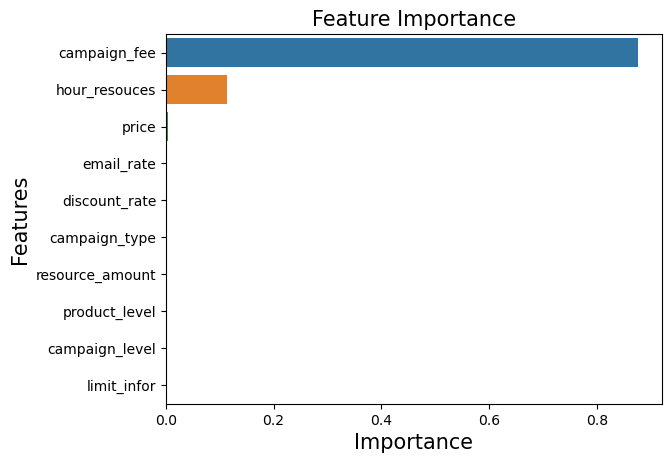

In [ ]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

**Interpretation:**
- The  campaign_fee and hour_resources are the primary drivers in the random forest model's predictions.
- price has minimal importance compared to the top two features.
- The remaining features (email_rate, discount_rate, campaign_type, resource_amount, product_level, campaign_level, limit_infor)   have negligible importance in the model.